In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

In [3]:
train["source"] = "train"
test["source"] = "test"
df = pd.concat([train, test], ignore_index=True)

In [4]:
print(df.shape)

(14204, 13)


In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [6]:
print(df.shape)
print(df.isna().sum())

(14204, 13)
Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


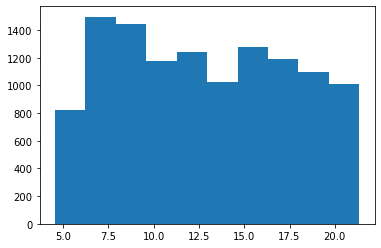

In [7]:
plt.hist(df["Item_Weight"])
plt.show()

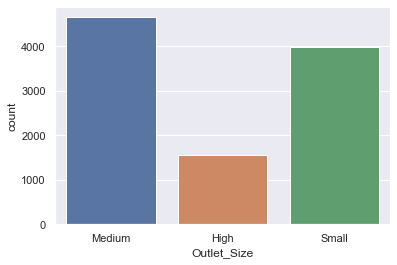

In [8]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Outlet_Size", data=df)
plt.show()

In [9]:
df["Item_Weight"].fillna(value = df["Item_Weight"].mean(), inplace=True)

In [10]:
df["Outlet_Size"].fillna(value = df["Outlet_Size"].mode()[0], inplace=True)

In [11]:
print(df["Item_Weight"].isna().sum())
print(df["Outlet_Size"].isna().sum())

0
0


In [12]:
print(df.shape)
print(df["Outlet_Size"].isna().sum())

(14204, 13)
0


In [13]:
df["Outlet_age"] = 2022 - df["Outlet_Establishment_Year"]

In [14]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24


In [15]:
for col in df:
    if(df[col].dtype == object or col in ["Item_Identifier","Outlet_Identifier"]):
        print(col,len(df[col].unique()), df[col].unique())                                                         #List of unique value

Item_Identifier 1559 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size 3 ['Medium' 'High' 'Small']
Outlet_Location_Type 3 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
source 2 ['train' 'test']


In [16]:
for col in df:
    if(df[col].dtype != object ):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)



        IQR = Q3 - Q1

        print("Old Shape: ", df.shape)

        # Upper bound
        upper = Q3+1.5*IQR
        # Lower bound
        lower = Q1-1.5*IQR

        ls = df.index[(df[col]< lower) ]

        ls2 = df.index[(df[col] > upper)]
        ind_lis = []
        ind_lis.extend(ls)
        ind_lis.extend(ls2)


        ''' Removing the Outliers '''
        df = df.drop(ind_lis)
        print("new Shape: ", df.shape)

Old Shape:  (14204, 14)
new Shape:  (14204, 14)
Old Shape:  (14204, 14)
new Shape:  (13943, 14)
Old Shape:  (13943, 14)
new Shape:  (13943, 14)
Old Shape:  (13943, 14)
new Shape:  (13943, 14)
Old Shape:  (13943, 14)
new Shape:  (13757, 14)
Old Shape:  (13757, 14)
new Shape:  (13757, 14)


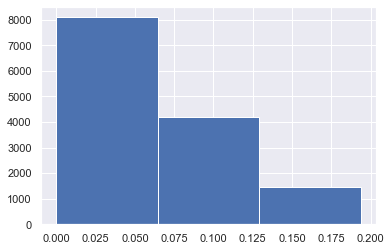

In [17]:
plt.hist(df["Item_Visibility"],bins = 3)
plt.show()

In [18]:
df["Item_Visibility_bin"] = pd.cut(df["Item_Visibility"], [0.0, 0.065, 0.126,0.2], labels= ["low_visible", "visible", "high_visible"])

In [19]:
df["Item_Visibility_bin"].value_counts()

low_visible     7267
visible         4015
high_visible    1610
Name: Item_Visibility_bin, dtype: int64

In [20]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['low fat','LF'], "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('reg', 'Regular')
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
Le = LabelEncoder()

In [22]:
df["Item_Fat_Content"] = Le.fit_transform(df["Item_Fat_Content"])
df["Item_Visibility_bin"] = Le.fit_transform(df["Item_Visibility_bin"])
df["Outlet_Size"] = Le.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = Le.fit_transform(df["Outlet_Location_Type"])

In [23]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [24]:
dummy = pd.get_dummies(df["Outlet_Type"])
dummy

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
14199,0,1,0,0
14200,0,0,1,0
14201,0,1,0,0
14202,0,1,0,0


In [25]:
df["Item_Identifier"].value_counts()

FDP11    10
FDZ47    10
FDE53    10
FDZ40    10
NCX30    10
         ..
FDU55     6
FDN58     6
DRE60     6
NCL42     6
FDZ43     6
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
df["Item_Identifier"]= df["Item_Identifier"].apply(lambda x : x[:2])

In [27]:
df["Item_Identifier"].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [28]:
df["Item_Identifier"].map({"FD" : "Food", "DR": "Drink","NC":"Non_consumable"})

0                  Food
1                 Drink
2                  Food
3                  Food
4        Non_consumable
              ...      
14199              Food
14200              Food
14201    Non_consumable
14202              Food
14203              Food
Name: Item_Identifier, Length: 13757, dtype: object

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age,Item_Visibility_bin
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,23,1
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,13,1
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,23,1
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,24,3
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,35,3


In [30]:
df = pd.get_dummies(df , columns = ["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Identifier"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13757 entries, 0 to 14203
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    13757 non-null  float64
 1   Item_Visibility                13757 non-null  float64
 2   Item_Type                      13757 non-null  object 
 3   Item_MRP                       13757 non-null  float64
 4   Outlet_Identifier              13757 non-null  object 
 5   Outlet_Establishment_Year      13757 non-null  int64  
 6   Item_Outlet_Sales              8189 non-null   float64
 7   source                         13757 non-null  object 
 8   Outlet_age                     13757 non-null  int64  
 9   Item_Visibility_bin            13757 non-null  int32  
 10  Item_Fat_Content_0             13757 non-null  uint8  
 11  Item_Fat_Content_1             13757 non-null  uint8  
 12  Outlet_Size_0                  13757 non-null 

In [32]:
df = df.drop(["Item_Type","Item_Visibility","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"], axis = 1)

In [33]:
train = df.loc[df["source"]=="train"]
test = df.loc[df["source"]=="test"]

In [34]:
train = train.drop("source", axis = 1)
test = test.drop(["source", "Item_Outlet_Sales"], axis = 1)

In [35]:
train.to_csv("train_mod.csv", index = False)
test.to_csv("test_mod.csv", index = False)

In [36]:
train = pd.read_csv("train_mod.csv")
test = pd.read_csv("test_mod.csv")

In [37]:
X = train.drop("Item_Outlet_Sales", axis = 1)
Y = train["Item_Outlet_Sales"]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=43)

In [39]:
lin = LinearRegression()

In [40]:
lin.fit(x_train, y_train)

LinearRegression()

In [41]:
prd = lin.predict(x_test)

In [42]:
com = pd.DataFrame(y_test)
com["Sales_predicted"] = prd

In [43]:
com["diff"] = com["Item_Outlet_Sales"] - com["Sales_predicted"]

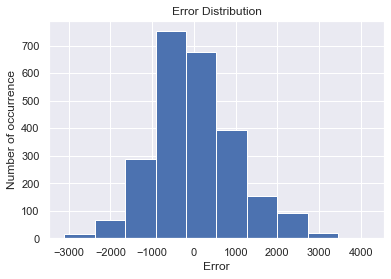

In [44]:
plt.hist(com["diff"])
plt.title("Error Distribution")
plt.ylabel("Number of occurrence")
plt.xlabel("Error")
plt.show()

In [45]:
r2_scores = r2_score(y_test, prd)
mean_squared_errors = mean_squared_error(y_test, prd)
print(" r2_score = ", r2_scores, "\n", "mean_squared_error = ", mean_squared_errors)

 r2_score =  0.5629384768003758 
 mean_squared_error =  1005762.9817835178


In [46]:
prd_final = lin.predict(test)

In [47]:
test["Item_Outlet_Sales"] = prd_final

In [48]:
test.to_csv("Solved_test_data")